In [57]:
# Load the required dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path

from scipy import stats
from scipy.stats import linregress
from scipy.stats import f_oneway

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', 150, 'display.max_rows', 255)
pd.options.display.float_format = '{:,.2f}'.format

In [58]:
file_path = Path("housingdata.csv")
df = pd.read_csv(file_path)
df.head()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,OverallCond,RoofMatl,Exterior1st,ExterCond,Foundation,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PavedDrive,SaleType,SalePrice,Age
0,60,RL,8450,AllPub,CollgCr,5,CompShg,VinylSd,TA,PConc,856,Y,1710,2,1,3,1,8,548,Y,WD,208500,5
1,20,RL,9600,AllPub,Veenker,8,CompShg,MetalSd,TA,CBlock,1262,Y,1262,2,0,3,1,6,460,Y,WD,181500,31
2,60,RL,11250,AllPub,CollgCr,5,CompShg,VinylSd,TA,PConc,920,Y,1786,2,1,3,1,6,608,Y,WD,223500,7
3,70,RL,9550,AllPub,Crawfor,5,CompShg,Wd Sdng,TA,BrkTil,756,Y,1717,1,0,3,1,7,642,Y,WD,140000,91
4,60,RL,14260,AllPub,NoRidge,5,CompShg,VinylSd,TA,PConc,1145,Y,2198,2,1,4,1,9,836,Y,WD,250000,8


In [55]:
# Set list of columns to keep for analysis
housing_df = df.copy()
housing_df.head()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,OverallCond,YearBuilt,RoofMatl,Exterior1st,ExterCond,Foundation,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,PavedDrive,YrSold,SaleType,SalePrice
0,60,RL,8450,AllPub,CollgCr,5,2003,CompShg,VinylSd,TA,PConc,856,Y,1710,2,1,3,1,8,548,Y,2008,WD,208500
1,20,RL,9600,AllPub,Veenker,8,1976,CompShg,MetalSd,TA,CBlock,1262,Y,1262,2,0,3,1,6,460,Y,2007,WD,181500
2,60,RL,11250,AllPub,CollgCr,5,2001,CompShg,VinylSd,TA,PConc,920,Y,1786,2,1,3,1,6,608,Y,2008,WD,223500
3,70,RL,9550,AllPub,Crawfor,5,1915,CompShg,Wd Sdng,TA,BrkTil,756,Y,1717,1,0,3,1,7,642,Y,2006,WD,140000
4,60,RL,14260,AllPub,NoRidge,5,2000,CompShg,VinylSd,TA,PConc,1145,Y,2198,2,1,4,1,9,836,Y,2008,WD,250000


In [8]:
# Home prices by the year Sold
housing_df.groupby(['Age']).agg({'SalePrice':['mean','median','std','min', 'max', 'count']})

SalePrice                                            
          mean     median        std     min     max count
Age                                                       
0   394,432.00 394,432.00        NaN  394432  394432     1
1   269,220.00 226,978.00 110,977.65  164500  611657    18
2   348,849.13 335,000.00 114,507.79  160000  582933    23
3   255,362.73 239,000.00  71,702.24  146000  426000    49
4   251,775.45 239,799.00  80,558.46   84500  465000    67
5   229,680.95 199,750.00  81,518.94  140000  556581    64
6   210,347.72 191,000.00  63,903.44  130000  354000    54
7   227,408.58 207,500.00  82,285.14  131500  538000    45
8   226,869.57 221,000.00  34,309.35  183200  312500    23
9   242,630.00 226,500.00  61,354.80  178000  466500    20
10  210,766.67 199,750.00  40,637.13  165000  313000    24
11  210,614.72 191,000.00  54,326.63  155000  337000    25
12  220,450.00 211,000.00  55,328.72  133000  340000    25
13  214,925.00 207,600.00  43,561.97  169000  348000    14
14  259,162.67 212,000.00 145,339.45  148000  745000    15
15  262,194.44 238,000.00 121,962.04  144000  625000    18
16  247,900.00 205,000.00 143,861.99  123600  755000    19
17  218,058.82 194,500.00  59,055.99  143000  341000    17
18  218,384.62 189,000.00  75,781.89  147000  430000    13
19  186,140.00 179,200.00  66,065.10   93500  260000     5
20  220,881.67 206,250.00  60,645.50  118500  320000    12
21  279,500.00 275,000.00  53,392.42  228500  335000     3
22  204,636.36 196,500.00  35,186.71  164000  277000    11
23  198,000.00 179,000.00  35,538.71  176000  239000     3
24  212,000.00 190,000.00  52,349.79  170000  301000     5
25  191,400.00 180,000.00  59,218.24  112000  275000     5
26  164,111.11 162,500.00  32,078.79  119500  207500     9
27  181,400.00 139,000.00  90,304.52  131000  316600     4
28  132,400.00 132,700.00   5,161.40  124500  138000     6
29  249,880.00 228,000.00  85,944.15  175500  385000     5
30  164,800.00 147,500.00  43,237.20  120000  260000    10
31  156,396.89 142,953.00  49,551.67   99500  260000     9
32  160,962.50 152,750.00  33,523.76  112000  250000    16
33  166,860.94 160,875.00  37,130.62   82500  272000    32
34  163,831.97 150,900.00  45,577.64   85000  299800    33
35  159,268.75 141,875.00  54,563.59  110000  280000     8
36  183,050.00 170,000.00  48,745.63  136000  294000    10
37  139,400.00 135,000.00  52,237.44   83000  244000    11
38  140,569.57 128,500.00  53,271.97   75500  345000    23
39  131,820.45 121,500.00  47,661.04   85400  302000    22
40  134,647.92 124,750.00  49,369.45   75000  268000    24
41  160,725.64 154,000.00  32,275.39  108959  223000    14
42  166,075.00 156,000.00  42,233.56  108000  262500    22
43  142,337.50 130,000.00  38,121.51   90000  242000    16
44  159,559.44 155,000.00  42,655.63  107000  274970    18
45  153,115.96 141,300.00  59,113.25   62383  375000    24
46  161,893.33 167,000.00  21,732.78  115000  190000    15
47  143,403.12 139,500.00  19,396.57  110000  186700    16
48  145,742.11 143,900.00  21,292.47  101800  176000    19
49  139,846.43 138,225.00  20,375.14   98600  178400    14
50  161,550.00 154,300.00  36,960.98  115000  242000    17
51  154,124.31 144,000.00  51,043.99   80000  335000    26
52  143,179.17 139,500.00  36,875.88   60000  277000    24
53  149,959.10 147,350.00  38,269.65   84000  257500    20
54  135,810.71 130,500.00  31,961.59   97000  230000    14
55  134,517.19 132,500.00  26,431.12   82000  190000    16
56  139,650.00 131,750.00  42,994.54   93000  256000    24
57  146,333.33 142,000.00  41,528.92   93000  225000    12
58  110,398.60 123,500.00  42,510.18   55993  166000     5
59  136,600.00 138,450.00  20,140.01  102000  164900     6
60  128,036.25 124,500.00  34,134.37   82000  243000    20
61  111,517.58 126,950.00  33,801.18   35311  145000    12
62  137,764.29 133,500.00  33,409.36   91500  225000    14
63  117,200.00 118,000.00  28,054.86   80500  159000     5
64  122,400.00 130,500.00  50,244.80   39300  200500

The correlation is: PearsonRResult(statistic=-0.5228973328794968, pvalue=2.9902290990137165e-103)


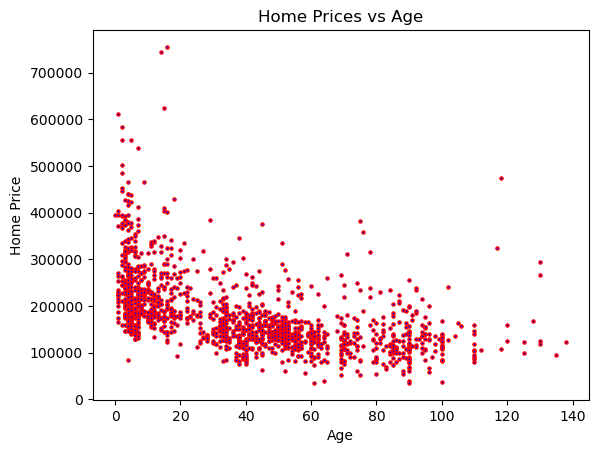

In [9]:
# Scatterplot of Home Price by Age of Home

y_values = housing_df['SalePrice']
x_values = housing_df['Age']
plt.scatter(x_values,y_values, c ="blue", linewidths = 1, marker ="o", edgecolor ="red", s = 5)
plt.title('Home Prices vs Age')
plt.ylabel('Home Price')
plt.xlabel('Age')

correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation is: {correlation}")
plt.show()

In [10]:
# Home prices by the year Sold
housing_df.groupby(['YrSold']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                    
             mean     median       std    min     max
YrSold                                               
2006   182,549.46 163,995.00 79,426.84  35311  625000
2007   186,063.15 167,000.00 85,768.17  39300  755000
2008   177,360.84 164,000.00 69,735.61  40000  446261
2009   179,432.10 162,000.00 80,879.24  34900  582933
2010   177,393.67 155,000.00 80,451.28  55000  611657

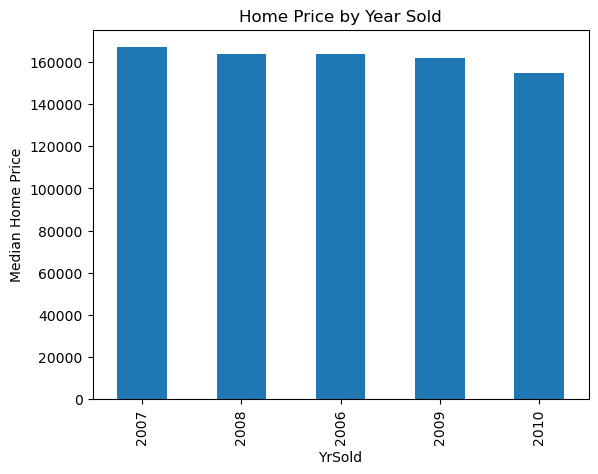

In [11]:
# Median Home Price by year it was sold
yr = housing_df.groupby(['YrSold'])
group0 = yr['SalePrice'].median().sort_values(ascending=False)
price_chart0 = group0.plot(kind='bar', title ='Home Price by Year Sold')
plt.ylabel('Median Home Price')
plt.show()

In [12]:
# Home prices by Overall Condition
housing_df.groupby(['OverallCond']).agg({'SalePrice':['mean','median','var','std','min', 'max']})

SalePrice                                                        
                  mean     median               var        std     min     max
OverallCond                                                                   
1            61,000.00  61,000.00               NaN        NaN   61000   61000
2           141,986.40  85,000.00 19,977,790,924.80 141,342.81   67000  394432
3           101,929.40  89,500.00  2,011,745,895.33  44,852.49   35311  200624
4           120,438.44 115,000.00  1,514,963,022.96  38,922.53   40000  235000
5           203,146.91 185,000.00  7,244,958,064.57  85,117.32   34900  745000
6           153,961.59 142,750.00  3,689,100,978.35  60,737.97   37900  755000
7           158,145.49 145,000.00  2,858,847,281.01  53,468.19   79900  402000
8           155,651.74 142,500.00  2,743,155,780.39  52,375.14   84500  335000
9           216,004.55 176,200.00  9,309,543,311.69  96,485.97  110500  475000

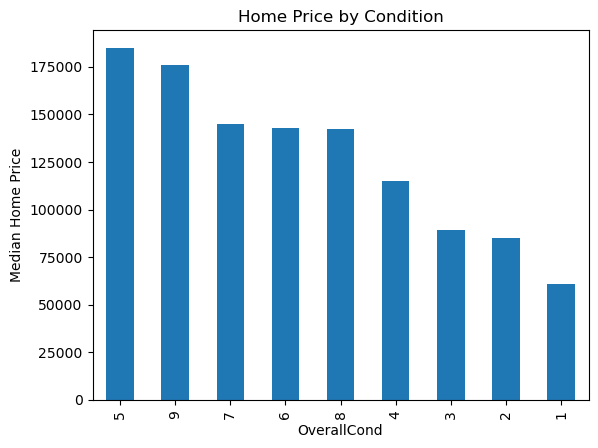

In [13]:
# Median Home Price by the overall condtion rating of the home
hse = housing_df.groupby(['OverallCond'])
group1 = hse['SalePrice'].median().sort_values(ascending=False)
price_chart1 = group1.plot(kind='bar', title ='Home Price by Condition')
plt.ylabel('Median Home Price')
plt.show()

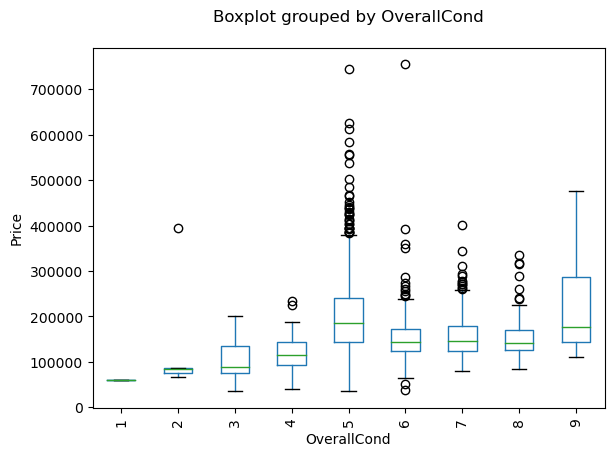

In [14]:
# Boxplot of the Price by Condtion ratiing
housing_df.boxplot(column = "SalePrice", by = "OverallCond", grid = False)
plt.xticks(rotation=90)
plt.title(" ")
plt.ylabel("Price")
plt.show()

In [15]:
# Home prices by Neighborhood
housing_df.groupby(['Neighborhood']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                      
                   mean     median        std     min     max
Neighborhood                                                 
Blmngtn      194,870.88 191,000.00  30,393.23  159895  264561
Blueste      137,500.00 137,500.00  19,091.88  124000  151000
BrDale       104,493.75 106,000.00  14,330.18   83000  125000
BrkSide      124,834.05 124,300.00  40,348.69   39300  223500
ClearCr      212,565.43 200,250.00  50,231.54  130000  328000
CollgCr      197,965.77 197,200.00  51,403.67  110000  424870
Crawfor      210,624.73 200,624.00  68,866.40   90350  392500
Edwards      128,219.70 121,750.00  43,208.62   58500  320000
Gilbert      192,854.51 181,000.00  35,986.78  141000  377500
IDOTRR       100,123.78 103,000.00  33,376.71   34900  169500
MeadowV       98,576.47  88,000.00  23,491.05   75000  151400
Mitchel      156,270.12 153,500.00  36,486.63   84500  271000
NAmes        145,847.08 140,000.00  33,075.35   87500  345000
NPkVill      142,694.44 146,000.00   9,377.31  127500  155000
NWAmes       189,050.07 182,900.00  37,172.22   82500  299800
NoRidge      335,295.32 301,500.00 121,412.66  190000  755000
NridgHt      316,270.62 315,000.00  96,392.54  154000  611657
OldTown      128,225.30 119,000.00  52,650.58   37900  475000
SWISU        142,591.36 139,500.00  32,622.92   60000  200000
Sawyer       136,793.14 135,000.00  22,345.13   62383  190000
SawyerW      186,555.80 179,900.00  55,652.00   76000  320000
Somerst      225,379.84 225,500.00  56,177.56  144152  423000
StoneBr      310,499.00 278,000.00 112,969.68  170000  556581
Timber       242,247.45 228,475.00  64,845.65  137500  378500
Veenker      238,772.73 218,000.00  72,369.32  162500  385000

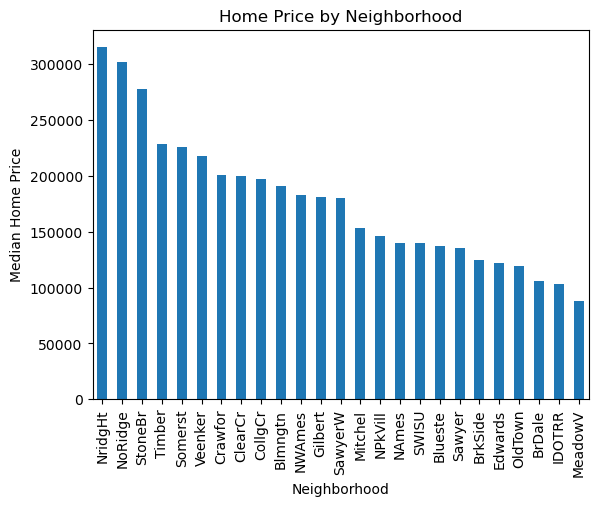

In [16]:
# Median Home Price by Neighborhood 
grp = housing_df.groupby(['Neighborhood'])
group = grp['SalePrice'].median().sort_values(ascending=False)
price_chart = group.plot(kind='bar', title ='Home Price by Neighborhood')
plt.ylabel('Median Home Price')
plt.show()

In [17]:
# Count missing/null values for each variable
housing_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Utilities        0
Neighborhood     0
OverallCond      0
YearBuilt        0
RoofMatl         0
Exterior1st      0
ExterCond        0
Foundation       0
TotalBsmtSF      0
CentralAir       0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageType      81
GarageCars       0
GarageArea       0
PavedDrive       0
YrSold           0
SaleType         0
SalePrice        0
Age              0
dtype: int64

In [18]:
# Check datatype of variables
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   Utilities     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   OverallCond   1460 non-null   int64 
 6   YearBuilt     1460 non-null   int64 
 7   RoofMatl      1460 non-null   object
 8   Exterior1st   1460 non-null   object
 9   ExterCond     1460 non-null   object
 10  Foundation    1460 non-null   object
 11  TotalBsmtSF   1460 non-null   int64 
 12  CentralAir    1460 non-null   object
 13  GrLivArea     1460 non-null   int64 
 14  FullBath      1460 non-null   int64 
 15  HalfBath      1460 non-null   int64 
 16  BedroomAbvGr  1460 non-null   int64 
 17  KitchenAbvGr  1460 non-null   int64 
 18  TotRmsAbvGrd  1460 non-null   int64 
 19  Garage

In [19]:
# Get quick summary of the variables.
housing_df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,YrSold,SalePrice,Age
count,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,56.90,"10,516.83",5.58,"1,971.27","1,057.43","1,515.46",1.57,0.38,2.87,1.05,6.52,1.77,472.98,"2,007.82","180,921.20",38.73
std,42.30,"9,981.26",1.11,30.20,438.71,525.48,0.55,0.50,0.82,0.22,1.63,0.75,213.80,1.33,"79,442.50",30.20
min,20.00,"1,300.00",1.00,"1,872.00",0.00,334.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,"2,006.00","34,900.00",0.00
25%,20.00,"7,553.50",5.00,"1,954.00",795.75,"1,129.50",1.00,0.00,2.00,1.00,5.00,1.00,334.50,"2,007.00","129,975.00",10.00
50%,50.00,"9,478.50",5.00,"1,973.00",991.50,"1,464.00",2.00,0.00,3.00,1.00,6.00,2.00,480.00,"2,008.00","163,000.00",37.00
75%,70.00,"11,601.50",6.00,"2,000.00","1,298.25","1,776.75",2.00,1.00,3.00,1.00,7.00,2.00,576.00,"2,009.00","214,000.00",56.00
max,190.00,"215,245.00",9.00,"2,010.00","6,110.00","5,642.00",3.00,2.00,8.00,3.00,14.00,4.00,"1,418.00","2,010.00","755,000.00",138.00


In [20]:
# Save cleaned dataframe to a cvs
# housing_df.to_csv('housing.csv',index=False)

C:\Users\rober\AppData\Local\Temp\ipykernel_24336\1535364262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = housing_df.corr().round(2)


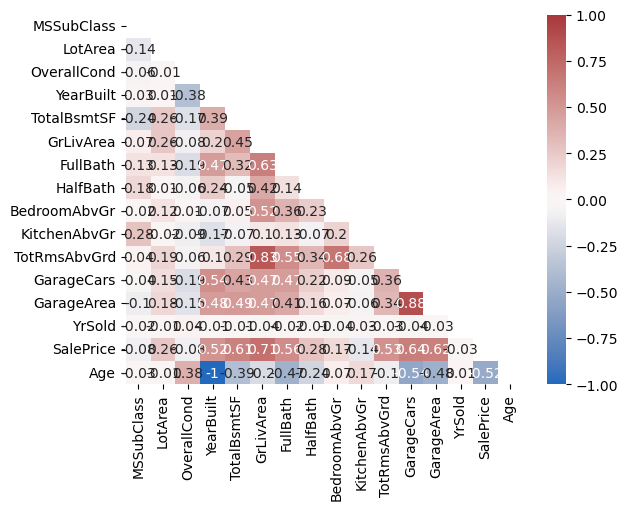

In [21]:
# Find correlation between the varaibles and plot a heatmap of the relationships
mat = housing_df.corr().round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
sns.heatmap(mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [22]:
# Check the kind of relationship between variables
# scatter_matrix(housing_df, alpha = 0.2, figsize = (20, 20), diagonal = 'hist')

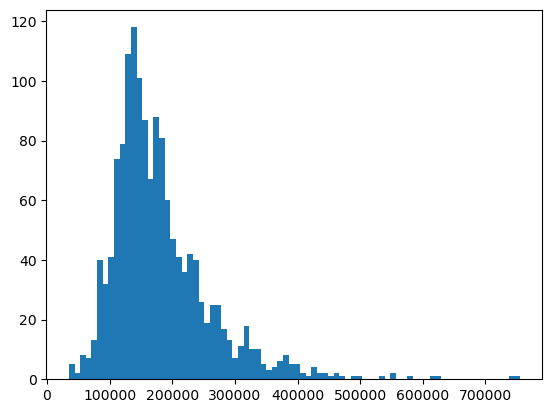

In [23]:
# Run some exploratory plots to find relationships.
plt.hist(housing_df['SalePrice'], bins=80)
plt.show()

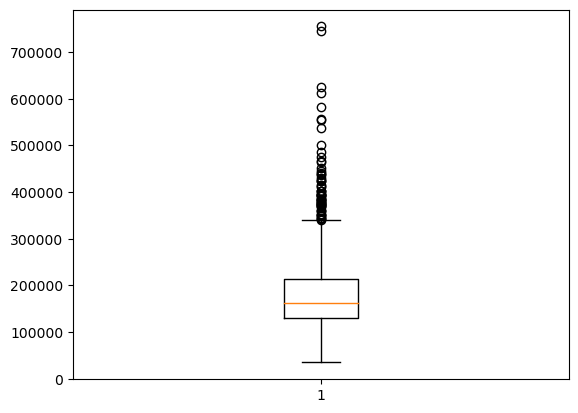

In [24]:
plt.boxplot(housing_df['SalePrice'])
plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_24336\1649768311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(housing_df.corr())


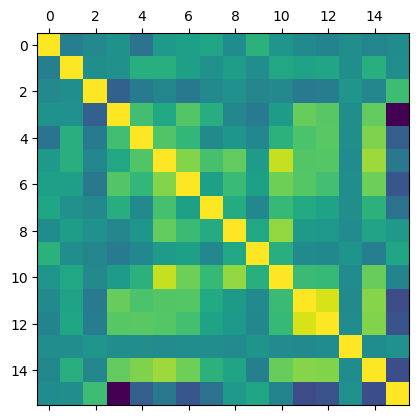

In [25]:
plt.matshow(housing_df.corr())
plt.show()

In [26]:
# Create a copy of the dataframe to use in neural networks
nn_df = df.copy()

In [27]:
nn_df = nn_df.drop(columns='Id', axis=1)
nn_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [28]:
nn_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [29]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy = ['MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df_dummies = pd.get_dummies(nn_df, columns=dummy)

df_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,"2,003.00",2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,"1,976.00",2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,"2,001.00",2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,"1,998.00",3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,"2,000.00",3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [30]:
# Calculate Z-values
df_dummies['price_scaled'] = np.abs(stats.zscore(df_dummies['SalePrice']))

# Filter out outliers
df_dummies = df_dummies[df_dummies['price_scaled'] <= 2.678]

# Drop the column
df_dummies = df_dummies.drop('price_scaled', axis=1)

In [31]:
df_dummies.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,"1,428.00","1,171.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,421.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,347.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00",...,"1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00","1,428.00"
mean,57.22,69.47,"10,358.61",6.03,5.59,"1,970.62","1,984.43",95.35,428.60,47.09,561.43,"1,037.12","1,144.61",339.03,5.57,"1,489.21",0.42,0.06,1.55,0.37,2.86,1.05,6.45,0.60,"1,977.9

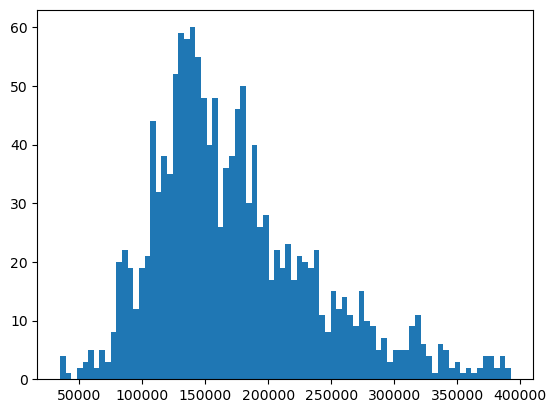

In [32]:
plt.hist(df_dummies['SalePrice'], bins=80)
plt.show()

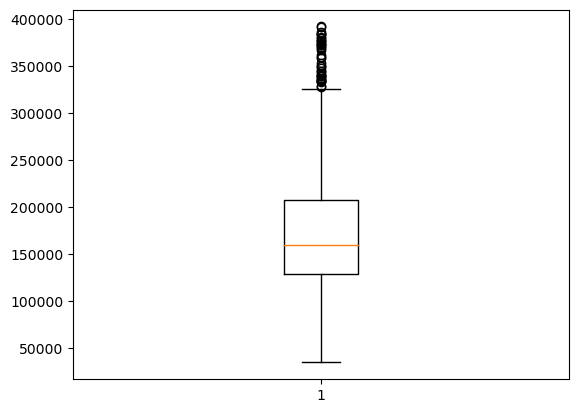

In [33]:
plt.boxplot(df_dummies['SalePrice'])
plt.show()

In [34]:
# Split our preprocessed data into our features and target arrays
y = df_dummies['SalePrice'].values
X = df_dummies.drop(['SalePrice'],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  256
# hidden_nodes_layer2 = 256
# hidden_nodes_layer3 = 128

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               73984     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 74241 (290.00 KB)
Trainable params: 74241 (290.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the model
nn.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [38]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
36/36 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: nan - accuracy: 0.0000e+00 - 209ms/epoch - 23ms/step
Loss: nan, Accuracy: 0.0


In [40]:
y_pred = nn.predict(X_test_scaled)
print(MeanSquaredError(y_test, y_pred).numpy())

# print(f'y_actual: {y_test}, y_pred:{y_pred}')


9/9 [==============================] - 0s 2ms/step


ValueError: Invalid Reduction Key: [196500 220000 143250 117000 176000 185750 215000 110500 144000 239000
 108959 128950 140000 109500 272000 160000 140000 155000 160200 191000
 151400 215000 140000 236500 107500 287000 139000 340000 118000 125000
 135000 235128 204000 392500 150000 164900 112000 171500 208900 162000
 386250 205950 318061 196000 302000 141000 134432 135960 110000 120500
 132000 135000 151000 135000 129000 128500  98000 115000 295000 193879
 227680 119500 155000  90350 157900 140000 205000 152000 105000 197000
 189950 137900 202500 120000 254900 221500 127000 193000 229000  95000
 128500 139950 126500 158000 174000 104000 144500 160000 270000 192000
 176485 120500 119000 140000 325000 187000 179400 170000  88000 184000
 197500 118500 162900 230000  80000 143500 169000 183000 160000  68400
 248900 309000  82000 187500 236000 138800 147000 102000 178740 122000
 143000  86000 140200  91000 207000  83000  98000 180000 180500 127000
 133000 174000 185000 228950  85000 190000 188500 132000 265000 126175
 350000 145000 158000 174000 189000  92900 142125 176000 150750 128500
 144000 178000 185000 170000  97000 123000 117500 144000 162500 109900
 181900 156000 283463 127000 116900 147000 133000 173500  85400 102000
 294000 144000 150900 194500 190000 271900 127000 113000 179900 307000
 182000 310000 228500 158000 100000 175000 119900 123600 168000 131000
 345000 239900 118500 143000 164990 198900  87000 163000 110000 319000
 229456  96500 339750 144000 187500  82000 249700 127500 153500 120500
 164000 107500 250000 135500 141000 271000 173000 239686 190000 206900
 125000 129000 168000 185000 282922 159500 180000 269500 178000 145250
 383970 100000 190000 318000 162000 177000 148500 167500 144500  87000
 243000 335000 192500 186700 222500 173000 168500 313000 231500 254000
  87500 117000 180500 260400 167240 128500 311872 105500 235000 205000
 180000  66500 147500 124500 205000 110000 206300 318000 177000 140000
 155835 131000 135000 236000 310000 160000 171000 220000 275000 228000
 139000 280000 187500 114500 110000 128000]. Expected keys are "('auto', 'none', 'sum', 'sum_over_batch_size')"